In [ ]:
from google.colab import files
dataset = files.upload()

Saving lama.csv to lama.csv


In [ ]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('lama.csv',delimiter=';')

In [ ]:
data.head()

Index        f1        F2        F3  ...      F12      F13      F14  Label
0      0  0.736626  0.597937  1.535647  ...  12.4585  20.4063  30.8238      1
1      1  0.694672  0.516291  1.806776  ...  14.1530  25.4531  41.2382      1
2      2  0.716667  0.547966  1.690245  ...  13.4940  24.6055  40.1646      1
3      3  0.673077  0.548412  1.763861  ...  15.1770  24.5586  39.6899      1
4      4  0.728216  0.548810  1.674075  ...  14.2070  25.6758  44.7681      1

[5 rows x 16 columns]

In [ ]:
data = data.drop('Index',1) 

In [ ]:
data.describe(include='all')

f1         F2         F3  ...        F13        F14      Label
count  91.000000  91.000000  91.000000  ...  91.000000  91.000000  91.000000
mean    0.801144   0.528114   1.599129  ...  19.134376  32.019782   2.131868
std     0.088447   0.060964   0.105854  ...   3.474921   4.686773   0.805658
min     0.545259   0.376311   1.388612  ...  10.996100  22.261100   1.000000
25%     0.736313   0.494571   1.512613  ...  16.539100  28.797650   2.000000
50%     0.805930   0.524788   1.585444  ...  19.214800  31.632200   2.000000
75%     0.868840   0.561067   1.664582  ...  21.427700  34.916700   2.000000
max     0.960714   0.668065   1.895543  ...  26.480500  45.448300   4.000000

[8 rows x 15 columns]

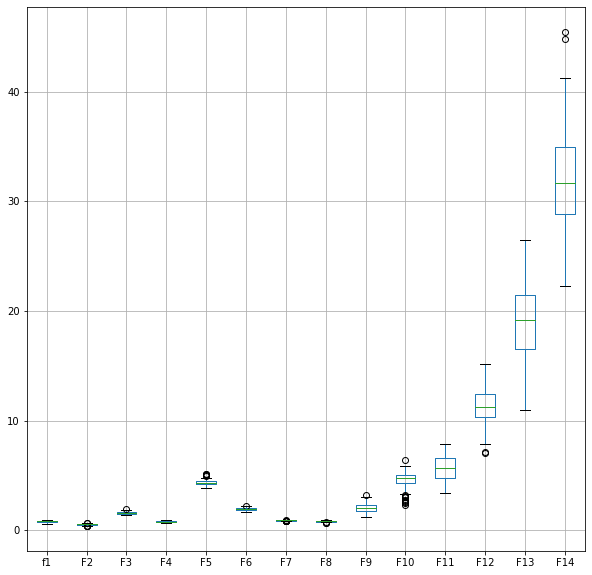

In [ ]:
from matplotlib import pyplot as plt

atribut = data[['f1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14']]
plt.figure(figsize=(10,10))
atribut.boxplot()

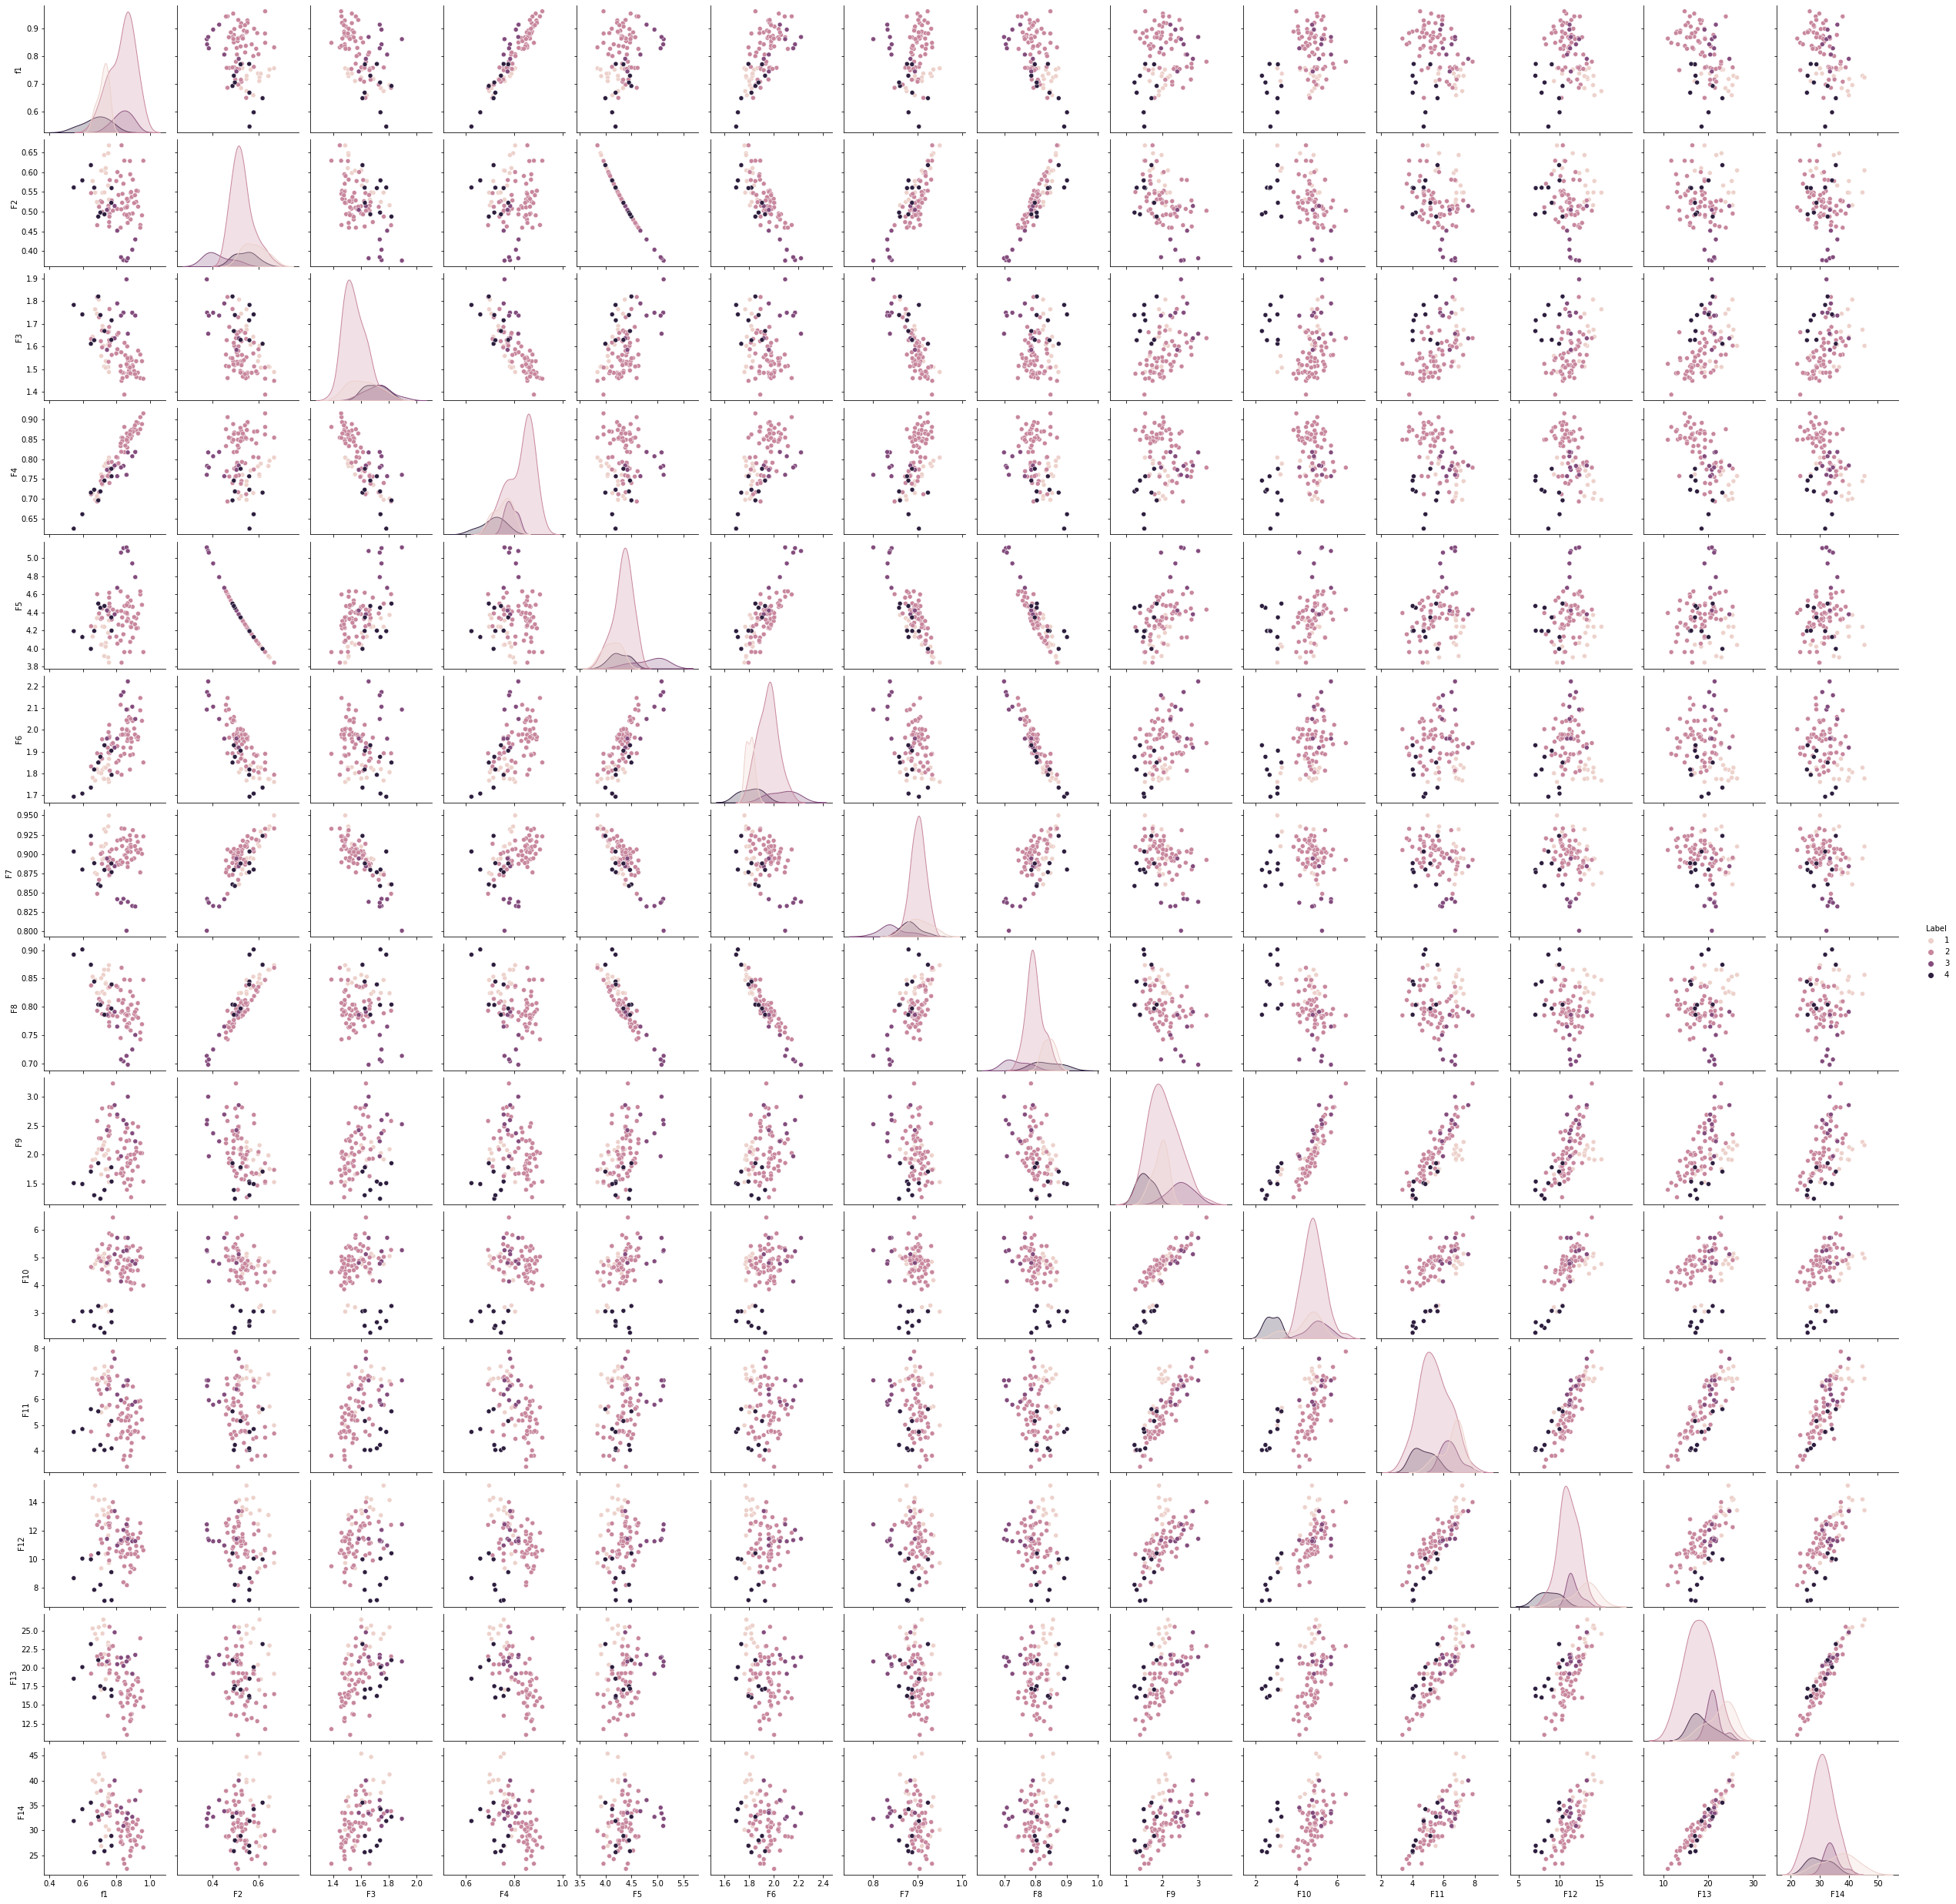

In [ ]:
import seaborn as sns

sns.pairplot(data=data, hue = "Label")

In [ ]:
print(data.groupby('Label').size())

Label
1    15
2    58
3     9
4     9
dtype: int64


In [ ]:
data

f1        F2        F3        F4  ...      F12      F13      F14  Label
0   0.736626  0.597937  1.535647  0.781507  ...  12.4585  20.4063  30.8238      1
1   0.694672  0.516291  1.806776  0.699669  ...  14.1530  25.4531  41.2382      1
2   0.716667  0.547966  1.690245  0.734749  ...  13.4940  24.6055  40.1646      1
3   0.673077  0.548412  1.763861  0.697036  ...  15.1770  24.5586  39.6899      1
4   0.728216  0.548810  1.674075  0.744214  ...  14.2070  25.6758  44.7681      1
..       ...       ...       ...       ...  ...      ...      ...      ...    ...
86  0.769697  0.522658  1.629506  0.775509  ...   9.0788  17.0703  28.8792      4
87  0.728571  0.493510  1.668296  0.745684  ...   7.0648  17.1914  25.8266      4
88  0.771028  0.559942  1.715493  0.756477  ...   7.1103  16.2148  26.9172      4
89  0.545259  0.561321  1.783165  0.623965  ...   8.6599  18.5391  31.8892      4
90  0.596567  0.579332  1.741307  0.660461  ...  10.0374  20.0977  34.2642      4

[91 rows x 15 columns]

In [ ]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur :
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [ ]:
data_normal = minmax(data)

In [ ]:
data_normal

f1        F2        F3        F4  ...       F12       F13       F14  Label
0   0.460619  0.759635  0.290048  0.539905  ...  0.664887  0.607721  0.369286      1
1   0.359638  0.479789  0.824893  0.259442  ...  0.873770  0.933649  0.818430      1
2   0.412578  0.588356  0.595017  0.379662  ...  0.792535  0.878910  0.772129      1
3   0.307658  0.589887  0.740237  0.250418  ...  1.000000  0.875882  0.751656      1
4   0.440377  0.591250  0.563119  0.412099  ...  0.880427  0.948032  0.970665      1
..       ...       ...       ...       ...  ...       ...       ...       ...    ...
86  0.540222  0.501611  0.475201  0.519350  ...  0.248268  0.392279  0.285420      4
87  0.441233  0.401708  0.551720  0.417136  ...  0.000000  0.400099  0.153770      4
88  0.543426  0.629404  0.644824  0.454125  ...  0.005609  0.337030  0.200805      4
89  0.000000  0.634132  0.778317  0.000000  ...  0.196630  0.487135  0.415233      4
90  0.123498  0.695864  0.695745  0.125071  ...  0.366436  0.587792  0.517661      4

[91 rows x 15 columns]

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_normal, test_size = 0.3, train_size = 0.7, random_state = 10)

In [ ]:
data_trainNB = data_train.copy()
data_testNB = data_test.copy()

In [ ]:
data_train.shape[0]

63

In [ ]:
data_test.shape[0]

28

In [ ]:
label_uji = data_test.copy().pop('Label')

In [ ]:
data_test.head()

f1        F2        F3        F4  ...       F12       F13       F14  Label
39  0.249026  0.585554  0.483135  0.298554  ...  0.394874  0.530773  0.390836      2
56  0.545246  0.521930  0.344473  0.578776  ...  0.777224  0.767908  0.643053      2
3   0.307658  0.589887  0.740237  0.250418  ...  1.000000  0.875882  0.751656      1
34  0.509635  0.295949  0.472135  0.498577  ...  0.654496  0.745712  0.576814      2
19  0.389326  0.515612  0.463799  0.413348  ...  0.532975  0.698032  0.677115      2

[5 rows x 15 columns]

In [ ]:
data_train.head()

f1        F2        F3        F4  ...       F12       F13       F14  Label
63  0.773628  0.380041  0.315546  0.754559  ...  0.405944  0.276995  0.340421      2
65  0.775186  0.326774  0.244455  0.789913  ...  0.707416  0.321898  0.283518      2
48  0.832412  0.551282  0.299372  0.802833  ...  0.290895  0.180627  0.181695      2
37  0.955428  0.285463  0.347486  0.862339  ...  0.673788  0.837533  0.676097      2
77  0.477802  0.440125  0.388282  0.510250  ...  0.537326  0.635717  0.485876      3

[5 rows x 15 columns]

In [ ]:
data_train_np = data_train.to_numpy()
print(data_train_np)

[[7.73627785e-01 3.80041127e-01 3.15546146e-01 7.54558838e-01
  5.14462593e-01 6.47214976e-01 5.87374141e-01 3.50436634e-01
  2.82631605e-01 6.32381735e-01 2.46914678e-01 4.05944134e-01
  2.76994911e-01 3.40420577e-01 2.00000000e+00]
 [7.75185711e-01 3.26773523e-01 2.44455217e-01 7.89912804e-01
  5.72031990e-01 7.56560358e-01 5.52661673e-01 3.23797124e-01
  3.09981432e-01 6.28393241e-01 5.03368838e-01 7.07415991e-01
  3.21898168e-01 2.83518493e-01 2.00000000e+00]
 [8.32412498e-01 5.51282437e-01 2.99372463e-01 8.02833129e-01
  3.46634692e-01 4.76869134e-01 6.15832778e-01 5.21937512e-01
  1.68113615e-01 4.31627547e-01 2.06733228e-01 2.90895195e-01
  1.80626954e-01 1.81695073e-01 2.00000000e+00]
 [9.55427846e-01 2.85462788e-01 3.47486429e-01 8.62338513e-01
  6.18675150e-01 7.48875313e-01 5.05633085e-01 2.79302679e-01
  4.82109700e-01 7.31949044e-01 5.73080430e-01 6.73787629e-01
  8.37533259e-01 6.76097157e-01 2.00000000e+00]
 [4.77802008e-01 4.40124577e-01 3.88281674e-01 5.10249514e-01
  

In [ ]:
data_test_np = data_test.to_numpy()
print(data_test_np)

[[0.24902616 0.58555359 0.48313478 0.29855436 0.31583804 0.26210152
  0.75400615 0.68768622 0.2793697  0.57081389 0.3053301  0.39487439
  0.53077291 0.39083632 2.        ]
 [0.54524617 0.5219297  0.34447341 0.57877647 0.37370335 0.45473323
  0.70399819 0.48413276 0.79244241 0.84737364 0.8662249  0.77722443
  0.76790835 0.64305306 2.        ]
 [0.3076581  0.58988684 0.74023729 0.25041757 0.31200421 0.14036939
  0.50113262 0.73545364 0.34134591 0.5961227  0.85212693 1.
  0.87588153 0.75165609 1.        ]
 [0.50963471 0.29594884 0.47213514 0.49857743 0.60666312 0.62319575
  0.53131298 0.33483892 0.79550359 0.86158718 0.76656067 0.6544957
  0.74571181 0.57681393 2.        ]
 [0.38932613 0.51561195 0.46379851 0.41334818 0.37961565 0.36864429
  0.66634901 0.54958559 0.52366136 0.62097223 0.63258544 0.53297503
  0.69803157 0.67711496 2.        ]
 [0.67398334 0.28530814 0.24881129 0.71597049 0.61885319 0.79710896
  0.60938717 0.23116632 0.51653535 0.66300853 0.45384804 0.4223885
  0.36957841 0

In [ ]:
import numpy as np 
 
class Knn:
  def __init__(self, k):
    self.__k = k
 
  def prediksi_data(self, data_train, data_test):
    jumlah_data_train = np.size(data_train,0)
    jumlah_kolom_train = np.size(data_train,1)
    index_kelas_data = None
    index_kelas_data = jumlah_kolom_train - 1
    
    kelas_dan_jarak = np.zeros((jumlah_data_train, 2))
 
    neighbors = None

    for baris in range(0, jumlah_data_train):
      kelas_dan_jarak[baris,0] = data_train[baris,index_kelas_data]
      temp_data_train = np.copy(data_train[baris,:])
      temp_data_test = np.copy(data_test)
      temp_data_train= np.delete(temp_data_train,[0,index_kelas_data])
      temp_data_test = np.delete(temp_data_test,[0,index_kelas_data])
      jarak = np.linalg.norm(temp_data_test  - temp_data_train)
      kelas_dan_jarak[baris,1] = jarak   
 
    kelas_dan_jarak = kelas_dan_jarak[kelas_dan_jarak[:,1].argsort()]
    k = self.__k
    neighbors = kelas_dan_jarak[:k,:]
    neighbors = neighbors [:,0]
    neighborsint = neighbors.astype(int)
    prediksi = np.bincount(neighborsint).argmax()
 
    return prediksi

In [ ]:
import numpy as np 

class CondensedKnn:
  def __init__(self, data_train):
    self.__data_train = data_train
 
  def get_trainingset(self ,k=1):
         
    condensed_data_train = np.copy(self.__data_train)
    jumlah_data_train = np.size(condensed_data_train,0)
    jumlah_kolom_train = np.size(condensed_data_train,1)
 
    print("\njumlah data sebelum Kondensasi : " + str(jumlah_data_train) + " data latih\n")

    index_kelas_data = jumlah_kolom_train - 1
    temporary_hasil = np.copy(condensed_data_train[0,:])
    baris_baru = np.copy(condensed_data_train[0,:])
    temporary_hasil = np.vstack([temporary_hasil,baris_baru])
 
    baris = 1
    while baris < jumlah_data_train:
      kelas_sebenarnya= condensed_data_train[baris,index_kelas_data]
      knn1 = Knn(k)
      this_instance = condensed_data_train[baris,:]
      prediction = knn1.prediksi_data(temporary_hasil,this_instance)

      if kelas_sebenarnya!= prediction:
        baris_baru = np.copy(this_instance)
        temporary_hasil = np.vstack([temporary_hasil,baris_baru])
        condensed_data_train = np.delete(condensed_data_train, baris, 0)
        jumlah_data_train -= 1
        
      baris += 1
 
    no_more_transfers_to_temporary_hasil = False
    no_more_instances_left = None
    jumlah_data_train = np.size(condensed_data_train,0)

    if jumlah_data_train > 0:
      no_more_instances_left = False
    else:
      no_more_instances_left = True
 
    while not(no_more_transfers_to_temporary_hasil) and not(no_more_instances_left):
      transfers_made = 0
      baris = 0
      while baris < jumlah_data_train:
        kelas_sebenarnya= condensed_data_train[baris,index_kelas_data]
        knn1 = Knn(k) 
        this_instance = condensed_data_train[baris,:]

        prediction = knn1.prediksi_data(temporary_hasil,this_instance)

        if kelas_sebenarnya!= prediction:
          baris_baru = np.copy(this_instance)
          temporary_hasil = np.vstack([temporary_hasil,baris_baru])
 
          condensed_data_train = np.delete(condensed_data_train, baris, 0)
          jumlah_data_train -= 1
          transfers_made += 1
             
        baris += 1
         
      jumlah_data_train = np.size(condensed_data_train,0)
 
      if jumlah_data_train > 0:
        no_more_instances_left = False
      else:
        no_more_instances_left = True
 
      if transfers_made > 0:
        no_more_transfers_to_temporary_hasil = False
      else: 
        no_more_transfers_to_temporary_hasil = True

    temporary_hasil = np.delete(temporary_hasil,0,0)

    print("Setelah proses Kondensasi : " + str(np.size(temporary_hasil,0)) + " data latih\n")
    return temporary_hasil

In [ ]:
np_data_set = data.to_numpy(copy=True)
cknn = CondensedKnn(data_train_np)
training_dataset = cknn.get_trainingset()


jumlah data sebelum Kondensasi : 63 data latih

Setelah proses Kondensasi : 19 data latih



In [ ]:
np_data_set = data.to_numpy(copy=True)
cknn = CondensedKnn(data_train_np)
training_dataset_3 = cknn.get_trainingset(3)


jumlah data sebelum Kondensasi : 63 data latih

Setelah proses Kondensasi : 24 data latih



In [ ]:
np_data_set = data.to_numpy(copy=True)
cknn = CondensedKnn(data_train_np)
training_dataset_5 = cknn.get_trainingset(5)


jumlah data sebelum Kondensasi : 63 data latih

Setelah proses Kondensasi : 27 data latih



In [ ]:
np_data_set = data.to_numpy(copy=True)
cknn = CondensedKnn(data_train_np)
training_dataset_7 = cknn.get_trainingset(7)


jumlah data sebelum Kondensasi : 63 data latih

Setelah proses Kondensasi : 26 data latih



In [ ]:
knn = Knn(3)
hasil_prediksi = []
hasil_prediksi_3 = []
hasil_prediksi_5 = []
hasil_prediksi_7 = []
for i in range(data_test.shape[0]):
  prediksi = knn.prediksi_data(training_dataset, data_test_np[i])
  prediksi_3 = knn.prediksi_data(training_dataset_3, data_test_np[i])
  prediksi_5 = knn.prediksi_data(training_dataset_5, data_test_np[i])
  prediksi_7= knn.prediksi_data(training_dataset_7, data_test_np[i])
  hasil_prediksi.append(prediksi)
  hasil_prediksi_3.append(prediksi_3)
  hasil_prediksi_5.append(prediksi_5)
  hasil_prediksi_7.append(prediksi_7)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confussion_matrix = confusion_matrix(label_uji, hasil_prediksi)
print("nilai confusion matriks k = 1 pada CNN ")
print(confussion_matrix)
print("----------------------------------------------------------------------------")
confussion_matrix_3 = confusion_matrix(label_uji, hasil_prediksi_3)
print("nilai confusion matriks k = 3 pada CNN ")
print(confussion_matrix_3)
print("----------------------------------------------------------------------------")
confussion_matrix_5 = confusion_matrix(label_uji, hasil_prediksi_5)
print("nilai confusion matriks k = 5 pada CNN ")
print(confussion_matrix_5)
print("----------------------------------------------------------------------------")
confussion_matrix_7 = confusion_matrix(label_uji, hasil_prediksi_7)
print("nilai confusion matriks k = 7 pada CNN ")
print(confussion_matrix_7)
print("----------------------------------------------------------------------------")

nilai confusion matriks k = 1 pada CNN 
[[ 5  0  0  0]
 [ 0 18  0  0]
 [ 0  1  0  0]
 [ 1  1  0  2]]
----------------------------------------------------------------------------
nilai confusion matriks k = 3 pada CNN 
[[ 5  0  0  0]
 [ 1 16  1  0]
 [ 0  0  1  0]
 [ 1  1  0  2]]
----------------------------------------------------------------------------
nilai confusion matriks k = 5 pada CNN 
[[ 5  0  0  0]
 [ 3 14  1  0]
 [ 0  0  1  0]
 [ 2  0  0  2]]
----------------------------------------------------------------------------
nilai confusion matriks k = 7 pada CNN 
[[ 5  0  0  0]
 [ 2 13  3  0]
 [ 0  0  1  0]
 [ 1  1  0  2]]
----------------------------------------------------------------------------


In [ ]:
def count(confussion_matrix):
  (tp,tn,fp,fn) = ([0]*4,[0]*4,[0]*4,[0]*4)  

  for i in range(len(confussion_matrix)):
    tp[i]=confussion_matrix[i][i]
  
  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (i!=j):
        fp[i]=fp[i]+confussion_matrix[j][i]

  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (i!=j):
        fn[i]=fn[i]+confussion_matrix[i][j]

  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (j!=0 and i!=0):
        tn[0] = tn[0] + confussion_matrix[i][j]
  
  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (j!=1 and i!=1):
        tn[1] = tn[1] + confussion_matrix[i][j]

  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (j!=2 and i!=2):
        tn[2] = tn[2] + confussion_matrix[i][j]

  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      if (j!=3 and i!=3):
        tn[3] = tn[3] + confussion_matrix[i][j]
  
  return (tp,tn,fp,fn)

In [ ]:
(tp_cnn,tn_cnn,fp_cnn,fn_cnn) = ([0]*4,[0]*4,[0]*4,[0]*4)  
(tp_cnn,tn_cnn,fp_cnn,fn_cnn)=count(confussion_matrix)
print(tp_cnn,tn_cnn,fp_cnn,fn_cnn)

[5, 18, 0, 2] [22, 8, 27, 24] [1, 2, 0, 0] [0, 0, 1, 2]


In [ ]:
def accuracy (tp,confussion_matrix):
  accuracy_cnn = 0
  total_cnn = 0

  for i in range(len(tp)):    
    accuracy_cnn = accuracy_cnn + tp[i]

  for i in range(len(confussion_matrix)):
    for j in range(len(confussion_matrix)):
      total_cnn = total_cnn + confussion_matrix[i][j]

  return accuracy_cnn/total_cnn

def precision (tp,fp):
  precision = [0]*4

  for i in range(4):
    precision[i] = tp[i]/(tp[i]+fp[i])

  for i in range(len(precision)):
    if (np.isnan(precision [i])==True):
      precision[i] = 0
    
  return precision

def recall(tp , fn):
  recal = [0]*4

  for i in range(4):
    recal[i] = tp[i]/(tp[i]+fn[i])

  for i in range(len(recal)):
    if (np.isnan(recal[i])==True):
      recal[i] = 0

  return(recal)

In [ ]:
print(accuracy(tp_cnn, confussion_matrix))

0.8928571428571429


In [ ]:
print(precision(tp_cnn, fp_cnn))

[0.8333333333333334, 0.9, 0, 1.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
print(recall(tp_cnn, fn_cnn))

[1.0, 1.0, 0.0, 0.5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


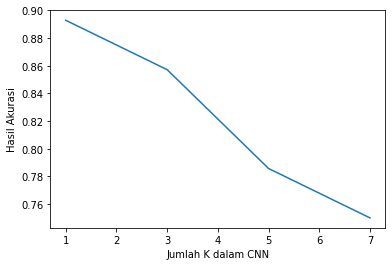

In [ ]:
JumlahK = list(range(1, 8,2))
prediksi = [hasil_prediksi,hasil_prediksi_3,hasil_prediksi_5,hasil_prediksi_7]
acc = []
prec = []
recl = []
for i in prediksi :
  confussion_matrix = confusion_matrix(label_uji, i)
  (tp_cnn,tn,fp,fn) = ([0]*4,[0]*4,[0]*4,[0]*4)  
  (tp,tn,fp,fn) = count(confussion_matrix)
  akurasi = accuracy(tp, confussion_matrix)
  presisi = precision(tp, fp)
  recal = recall(tp,fn)
  acc.append(akurasi)
  prec.append(presisi)
  recl.append(recal)

plt.plot(JumlahK, acc)
plt.xlabel("Jumlah K dalam CNN")
plt.ylabel("Hasil Akurasi")
plt.show()

In [ ]:
acc

[0.8928571428571429, 0.8571428571428571, 0.7857142857142857, 0.75]

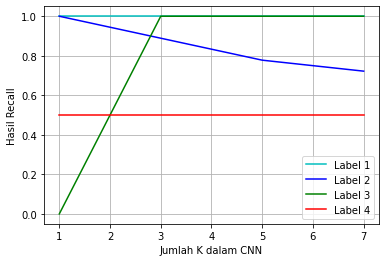

In [ ]:
recl1 = [recl[0][0],recl[1][0],recl[2][0],recl[3][0]]
recl3 = [recl[0][1],recl[1][1],recl[2][1],recl[3][1]]
recl5 = [recl[0][2],recl[1][2],recl[2][2],recl[3][2]]
recl7 = [recl[0][3],recl[1][3],recl[2][3],recl[3][3]]

plt.plot(JumlahK, recl1,'c', label ='Label 1')
plt.plot(JumlahK, recl3,'b', label ='Label 2')
plt.plot(JumlahK, recl5,'g', label ='Label 3')
plt.plot(JumlahK, recl7,'r', label ='Label 4')
plt.xlabel("Jumlah K dalam CNN")
plt.ylabel("Hasil Recall")
plt.legend()
plt.grid()
plt.show()

In [ ]:
prec1 = [prec[0][0],prec[1][0],prec[2][0],prec[3][0]]
prec3 = [prec[0][1],prec[1][1],prec[2][1],prec[3][1]]
prec5 = [prec[0][2],prec[1][2],prec[2][2],prec[3][2]]
prec7 = [prec[0][3],prec[1][3],prec[2][3],prec[3][3]]

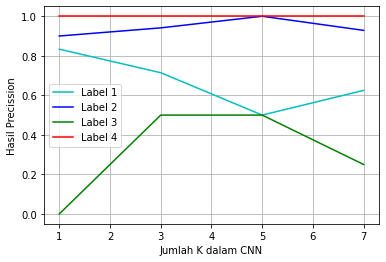

In [ ]:
plt.plot(JumlahK, prec1,'c', label ='Label 1')
plt.plot(JumlahK, prec3,'b', label ='Label 2')
plt.plot(JumlahK, prec5,'g', label ='Label 3')
plt.plot(JumlahK, prec7,'r', label ='Label 4')
plt.xlabel("Jumlah K dalam CNN")
plt.ylabel("Hasil Precission")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# melakukan import librari classification_report dari librari sklearn.metrics
from sklearn.metrics import classification_report

# mencetak laporan dari klasifikasi berupa precission recall f1-score dan support
print("nilai k = 1 pada CNN")
print(classification_report(label_uji, hasil_prediksi))
print("----------------------------------------------------------------------------")
print("nilai k = 3 pada CNN")
print(classification_report(label_uji, hasil_prediksi_3))
print("----------------------------------------------------------------------------")
print("nilai k = 5 pada CNN")
print(classification_report(label_uji, hasil_prediksi_5))
print("----------------------------------------------------------------------------")
print("nilai k = 7 pada CNN")
print(classification_report(label_uji, hasil_prediksi_7))
print("----------------------------------------------------------------------------")

nilai k = 1 pada CNN
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.90      1.00      0.95        18
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         4

    accuracy                           0.89        28
   macro avg       0.68      0.62      0.63        28
weighted avg       0.87      0.89      0.87        28

----------------------------------------------------------------------------
nilai k = 3 pada CNN
              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.94      0.89      0.91        18
           3       0.50      1.00      0.67         1
           4       1.00      0.50      0.67         4

    accuracy                           0.86        28
   macro avg       0.79      0.85      0.77        28
weighted avg       0.89      0.86      0.86        28

-----------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df = pd.DataFrame(training_dataset , columns=['f1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','Label'])

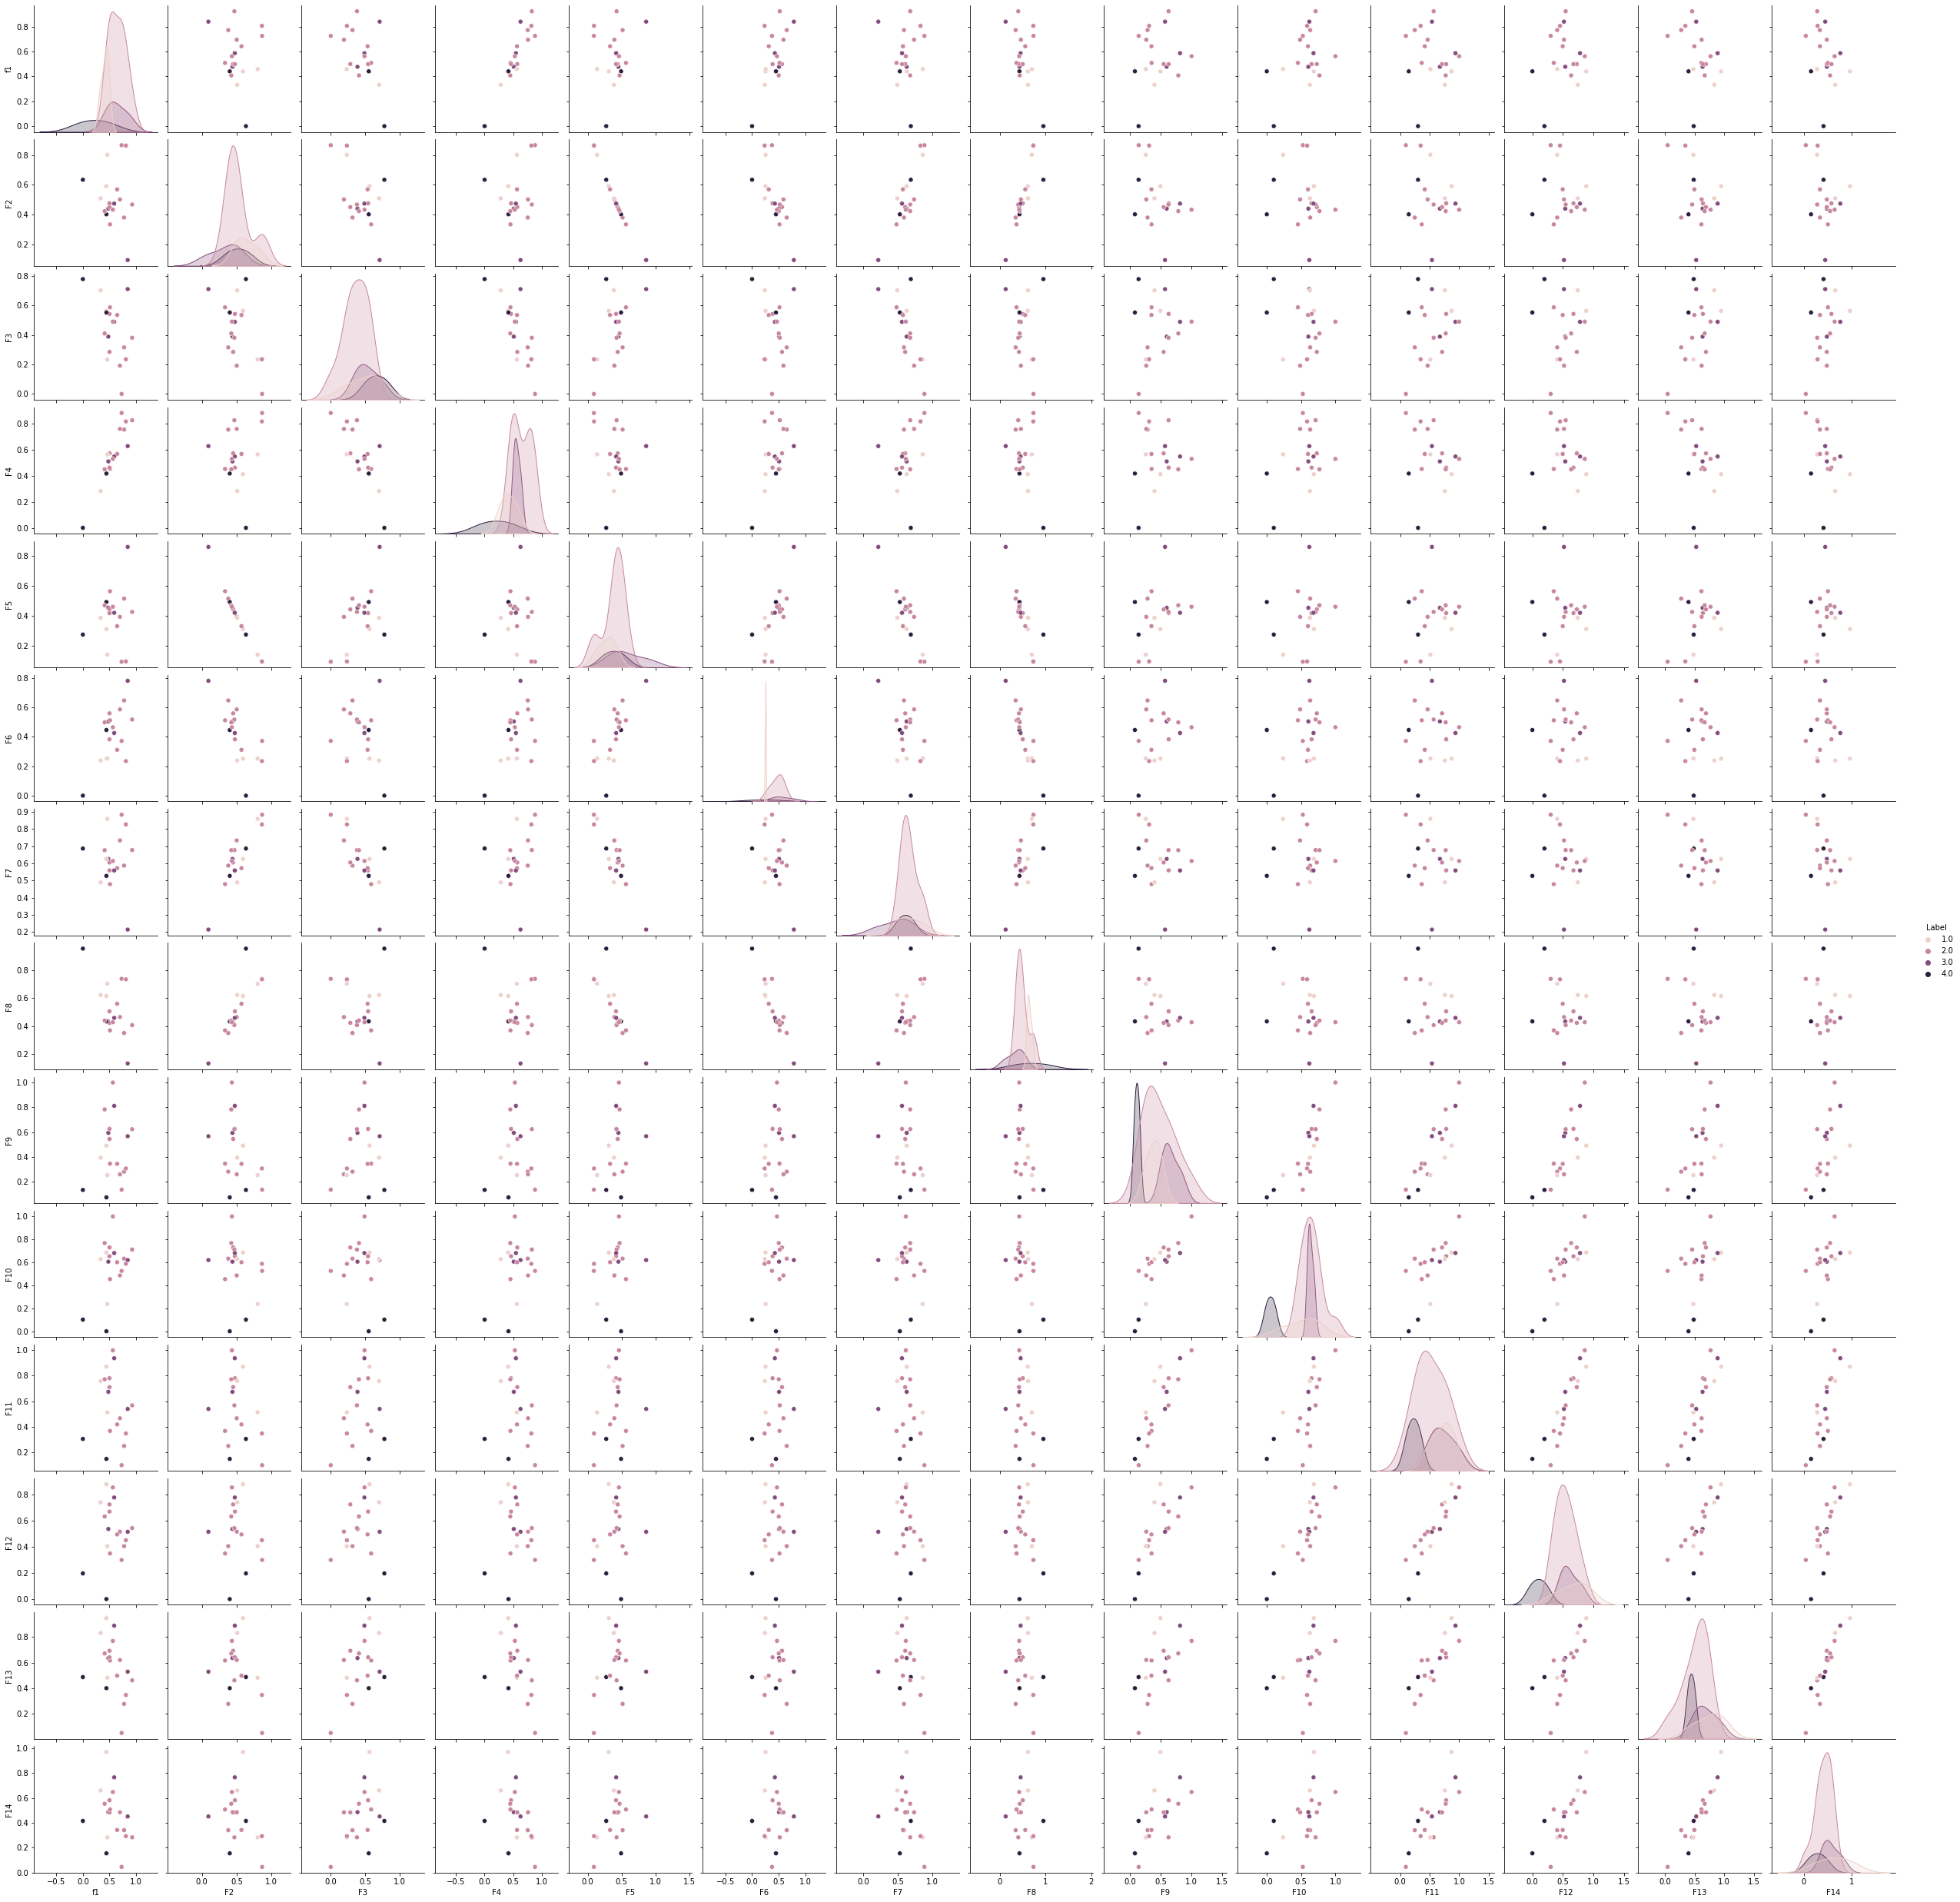

In [ ]:
import seaborn as sns

sns.pairplot(data=df, hue = "Label")

In [ ]:
df = pd.DataFrame(training_dataset_7 , columns=['f1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','Label'])

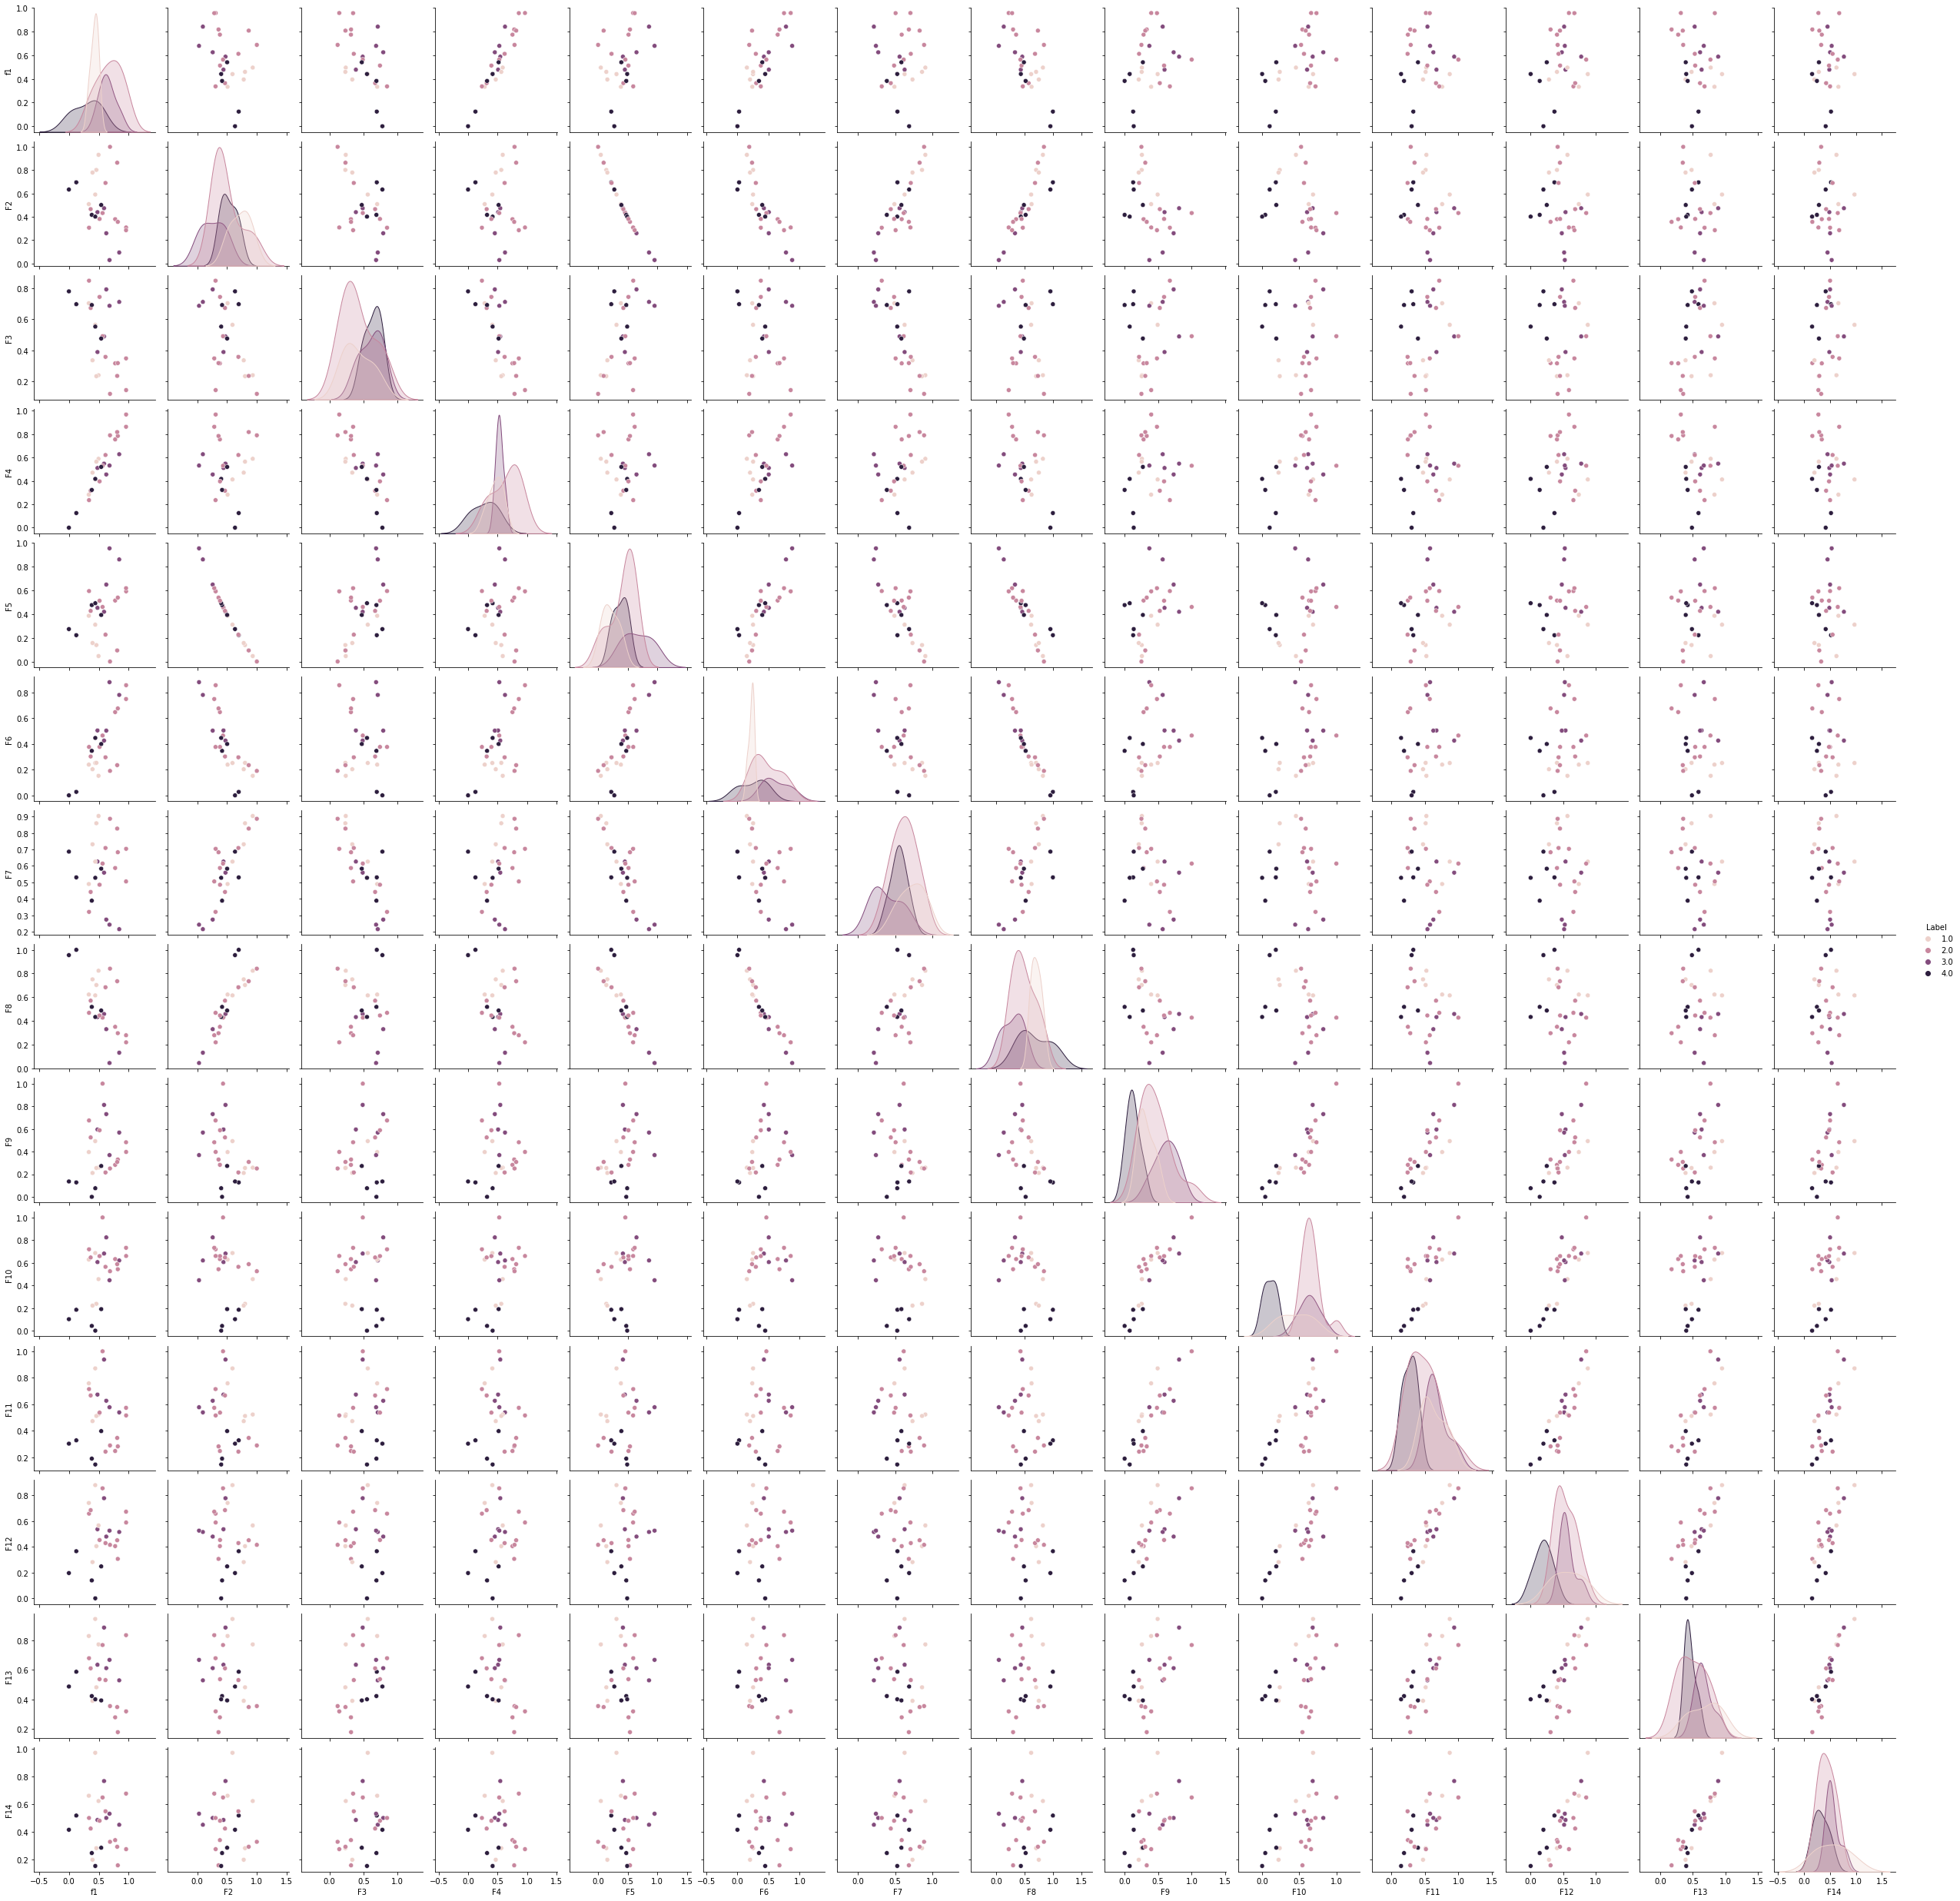

In [ ]:
import seaborn as sns

sns.pairplot(data=df, hue = "Label")

# Naive Bayes

In [ ]:
data_trainNB.shape[0]

63

In [ ]:
data_testNB.shape[0]

28

In [ ]:
data_trainNB.head()

f1        F2        F3        F4  ...       F12       F13       F14  Label
63  0.773628  0.380041  0.315546  0.754559  ...  0.405944  0.276995  0.340421      2
65  0.775186  0.326774  0.244455  0.789913  ...  0.707416  0.321898  0.283518      2
48  0.832412  0.551282  0.299372  0.802833  ...  0.290895  0.180627  0.181695      2
37  0.955428  0.285463  0.347486  0.862339  ...  0.673788  0.837533  0.676097      2
77  0.477802  0.440125  0.388282  0.510250  ...  0.537326  0.635717  0.485876      3

[5 rows x 15 columns]

In [ ]:
label_ujiNB = data_testNB.pop('Label')

In [ ]:
# fungsi menghitung prior
from collections import Counter 
def hitung_prior(list_kelas): 
  n_data = len(list_kelas) 
  prior = Counter(list_kelas) 
  for key in prior.keys():
    prior[key] = prior[key]/n_data 
  return prior 

In [ ]:
prior = hitung_prior(data_train['Label'])
print(prior)

Counter({2: 0.6349206349206349, 1: 0.15873015873015872, 3: 0.12698412698412698, 4: 0.07936507936507936})


In [ ]:
def hitung_rata2_std_kelas(input_data): 
  list_columns = input_data.columns[:-1] 
  class_columns_name = input_data.columns[-1]
  list_class = set(input_data[class_columns_name]) 
  rata2 = {} 
  std = {} 
  for column in list_columns: 
    for a_class in list_class: 
      rata2[(a_class,column)] = input_data.loc[input_data[class_columns_name]==a_class][column].mean() 
      std[(a_class,column)] = input_data.loc[input_data[class_columns_name]==a_class][column].std()
  return(rata2,std) 

In [ ]:
import math
def hitung_likelihood_gaussian(data,rata2,std):
  hasil = (1/math.sqrt(2*math.pi*(std**2)))*math.exp((-1*((data-rata2)**2))/(2*(std**2)))
  return hasil 

In [ ]:
# proses training
def training_naive_bayes_gaussian(data_latih): 
  class_column_name = data_latih.columns[-1] 
  prior = hitung_prior(data_latih[class_column_name]) 
  (rata2,std) = hitung_rata2_std_kelas(data_latih) 
  list_class = set(data_latih[class_column_name]) 
  list_columns = data_latih.columns[:-1] 
  model = {} 
  model['prior'] = prior 
  model['rata2'] = rata2 
  model['std'] = std 
  model['list_class'] = list_class 
  model['list_columns'] = list_columns 
  return model 

In [ ]:
model = training_naive_bayes_gaussian(data_train)

for key in model.keys():
  print("nilai", key)
  print(model[key])
  print()

nilai prior
Counter({2: 0.6349206349206349, 1: 0.15873015873015872, 3: 0.12698412698412698, 4: 0.07936507936507936})

nilai rata2
{(1, 'f1'): 0.42232856639468375, (2, 'f1'): 0.7134934842566174, (3, 'f1'): 0.6981367043099533, (4, 'f1'): 0.29750211686245753, (1, 'F2'): 0.77611836813789, (2, 'F2'): 0.5014854312906334, (3, 'F2'): 0.1881198167242812, (4, 'F2'): 0.5300339062602402, (1, 'F3'): 0.3727345392032769, (2, 'F3'): 0.3424375722204192, (3, 'F3'): 0.6235925347784993, (4, 'F3'): 0.6382807763960935, (1, 'F4'): 0.4783486998177741, (2, 'F4'): 0.7031347211870814, (3, 'F4'): 0.5677600666461784, (4, 'F4'): 0.27685021325354897, (1, 'F5'): 0.1647238546626868, (2, 'F5'): 0.40219549929159, (3, 'F5'): 0.7552423039524307, (4, 'F5'): 0.37134091509900136, (1, 'F6'): 0.19568904696701966, (2, 'F6'): 0.502625228110087, (3, 'F6'): 0.7094838207978709, (4, 'F6'): 0.24367223412308103, (1, 'F7'): 0.759934219232144, (2, 'F7'): 0.6528018773248395, (3, 'F7'): 0.3315924737294723, (4, 'F7'): 0.5433071404836493, (

In [ ]:
print('prior')
print(model['prior'])
print('rata2')
print(model['rata2'])
print('standar deviasi')
print(model['std'])

prior
Counter({2: 0.6349206349206349, 1: 0.15873015873015872, 3: 0.12698412698412698, 4: 0.07936507936507936})
rata2
{(1, 'f1'): 0.42232856639468375, (2, 'f1'): 0.7134934842566174, (3, 'f1'): 0.6981367043099533, (4, 'f1'): 0.29750211686245753, (1, 'F2'): 0.77611836813789, (2, 'F2'): 0.5014854312906334, (3, 'F2'): 0.1881198167242812, (4, 'F2'): 0.5300339062602402, (1, 'F3'): 0.3727345392032769, (2, 'F3'): 0.3424375722204192, (3, 'F3'): 0.6235925347784993, (4, 'F3'): 0.6382807763960935, (1, 'F4'): 0.4783486998177741, (2, 'F4'): 0.7031347211870814, (3, 'F4'): 0.5677600666461784, (4, 'F4'): 0.27685021325354897, (1, 'F5'): 0.1647238546626868, (2, 'F5'): 0.40219549929159, (3, 'F5'): 0.7552423039524307, (4, 'F5'): 0.37134091509900136, (1, 'F6'): 0.19568904696701966, (2, 'F6'): 0.502625228110087, (3, 'F6'): 0.7094838207978709, (4, 'F6'): 0.24367223412308103, (1, 'F7'): 0.759934219232144, (2, 'F7'): 0.6528018773248395, (3, 'F7'): 0.3315924737294723, (4, 'F7'): 0.5433071404836493, (1, 'F8'): 0.7

In [ ]:
# proses testing
def testing_naive_bayes_gaussian(model,data_uji): 
  rata2 = model['rata2'] 
  std = model['std'] 
  list_class = model['list_class'] 
  list_columns = model['list_columns'] 
  posterior = dict.fromkeys(list_class,1) 
  for a_class in list_class: 
    for column in list_columns:  
      posterior[a_class] = posterior[a_class]*hitung_likelihood_gaussian(data_uji[column],rata2[(a_class,column)],std[(a_class,column)])
    posterior[a_class] = posterior[a_class]*prior[a_class] 
  kelas_uji = max(posterior,key=posterior.get)
  return kelas_uji

In [ ]:
prediksi_total=[] 
for indeks in range(data_test.shape[0]): 
  prediksi_total.append(testing_naive_bayes_gaussian(model,data_test.iloc[indeks]))

In [ ]:
print("prediksi Gaussian Naive Bayes")
print(classification_report(label_ujiNB, prediksi_total))
print("----------------------------------------------------------------------------")

prediksi Gaussian Naive Bayes
              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.94      0.83      0.88        18
           3       0.50      1.00      0.67         1
           4       1.00      0.75      0.86         4

    accuracy                           0.82        28
   macro avg       0.75      0.85      0.77        28
weighted avg       0.87      0.82      0.83        28

----------------------------------------------------------------------------


# Perbandingan Condensed Nearest Neighbor (CNN) dan Naive Bayes



> **Naive Bayes**



In [ ]:
from sklearn.metrics import confusion_matrix
confussion_matrix_NB = confusion_matrix(label_ujiNB, prediksi_total)
print(confussion_matrix_NB)

[[ 4  1  0  0]
 [ 2 15  1  0]
 [ 0  0  1  0]
 [ 1  0  0  3]]


In [ ]:
(tp_nb,tn_nb,fp_nb,fn_nb) = ([0]*4,[0]*4,[0]*4,[0]*4)  



> **CNN & Naive Bayes**



In [ ]:
#Classification Report Naive Bayes
print(classification_report(label_ujiNB, prediksi_total))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       0.94      0.83      0.88        18
           3       0.50      1.00      0.67         1
           4       1.00      0.75      0.86         4

    accuracy                           0.82        28
   macro avg       0.75      0.85      0.77        28
weighted avg       0.87      0.82      0.83        28



In [ ]:
#Classification Report CNN dengan K = 3
print(classification_report(label_uji, hasil_prediksi_3))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83         5
           2       0.94      0.89      0.91        18
           3       0.50      1.00      0.67         1
           4       1.00      0.50      0.67         4

    accuracy                           0.86        28
   macro avg       0.79      0.85      0.77        28
weighted avg       0.89      0.86      0.86        28



In [ ]:
#Confusion Matrix Naive Bayes
print(confussion_matrix_NB)

[[ 4  1  0  0]
 [ 2 15  1  0]
 [ 0  0  1  0]
 [ 1  0  0  3]]


In [ ]:
#Confusion Matrix CNN dengan K = 3
confussion_matrix_CNN = confusion_matrix(label_uji, hasil_prediksi_3)
print(confussion_matrix_CNN)

[[ 5  0  0  0]
 [ 1 16  1  0]
 [ 0  0  1  0]
 [ 1  1  0  2]]


In [ ]:
(tp_nb,tn_nb,fp_nb,fn_nb) = count(confussion_matrix_NB)
print(tp_nb,tn_nb,fp_nb,fn_nb)

[4, 15, 1, 3] [20, 9, 26, 24] [3, 1, 1, 0] [1, 3, 0, 1]


In [ ]:
(tp_cnn,tn_cnn,fp_cnn,fn_cnn) = ([0]*4,[0]*4,[0]*4,[0]*4)  

In [ ]:
(tp_cnn,tn_cnn,fp_cnn,fn_cnn)=count(confussion_matrix_CNN)
print(tp_cnn,tn_cnn,fp_cnn,fn_cnn)

[5, 16, 1, 2] [21, 9, 26, 24] [2, 1, 1, 0] [0, 2, 0, 2]


In [ ]:
acc_nb= accuracy(tp_nb,confussion_matrix_NB)
print(acc_nb)

0.8214285714285714


In [ ]:
acc_cnn = accuracy(tp_cnn,confussion_matrix_CNN)
print(acc_cnn)

0.8571428571428571


In [ ]:
prec_nb = precision(tp_nb,fp_nb)
print(prec_nb)

[0.5714285714285714, 0.9375, 0.5, 1.0]


In [ ]:
prec_cnn = precision(tp_cnn,fp_cnn)
print(prec_cnn)

[0.7142857142857143, 0.9411764705882353, 0.5, 1.0]


In [ ]:
rec_nb = recall(tp_nb,fn_nb)
print(rec_nb)

[0.8, 0.8333333333333334, 1.0, 0.75]


In [ ]:
rec_cnn = recall(tp_cnn,fn_cnn)
print(rec_cnn)

[1.0, 0.8888888888888888, 1.0, 0.5]


In [ ]:
jumlahK=[1,2]
prediksi = [hasil_prediksi,prediksi_total]
acc = []
prec = []
recl = []
# CNN
acc.append(acc_cnn)
acc.append(acc_nb)
prec.append(prec_cnn)
prec.append(prec_nb)
recl.append(rec_cnn)
recl.append(rec_nb)

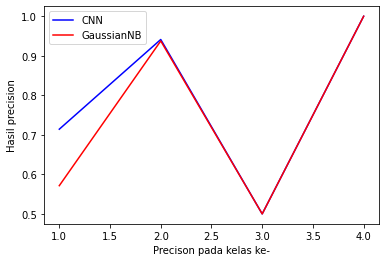

In [ ]:
kelas = list(range(1,5))
plt.plot(kelas, prec[0],'b', label = 'CNN')
plt.plot(kelas, prec[1],'r',label = 'GaussianNB')
plt.xlabel("Precison pada kelas ke-")
plt.ylabel("Hasil precision")
plt.legend()
plt.show()

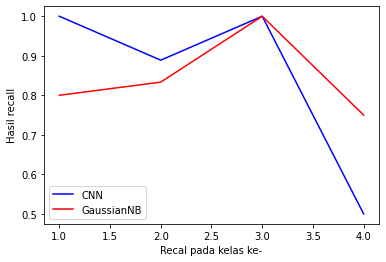

In [ ]:
kelas = list(range(1,5))
plt.plot(kelas,recl[0],'b', label = 'CNN')
plt.plot(kelas, recl[1],'r',label = 'GaussianNB')
plt.xlabel("Recal pada kelas ke-")
plt.ylabel("Hasil recall")
plt.legend()
plt.show()